In [36]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

In [21]:
def get_block_start(i, data):
    rsp_data = data['bp_data'][0][0][0][:, 1] 
    REJECT = []
    block_start = data['bp_data'][0][0][6]
    block_start_clean = []
    
    if block_start[0] < 0:
        t = 0
        t =+ abs(int(block_start[0]))
        block_start_clean.append(abs(int(block_start[0])))
        for i in np.arange(start =1, stop = len(block_start)):
            if block_start[i] < 0:
                t += (abs(int(block_start[i])))
                block_start_clean.append(t)
            else:
                block_start_clean.append(t + int(block_start[i]))
        if block_start_clean[-1] > len(rsp_data):
            REJECT.append(i)
    else:
        for i in range(len(block_start)):
            block_start_clean.append(abs(int(block_start[i])))
        if block_start_clean[-1] > len(rsp_data):
            REJECT.append(i)
    return block_start_clean 

In [27]:
def clean_rsp(block_start, rsp_data):
    #print(block_start)
    b, a = signal.butter(4, 0.3, 'lowpass', fs=1000)
    rsp_blocks = [rsp_data[0:block_start[0]-1], rsp_data[block_start[0]:block_start[1]-1], rsp_data[block_start[1]:block_start[2]-1], rsp_data[block_start[2]:block_start[3]-1], rsp_data[block_start[3]:block_start[4]-1], rsp_data[block_start[4]:block_start[5]-1], rsp_data[block_start[5]:block_start[6]-1], rsp_data[block_start[6]:]]
    filtered_rsp_blocks = []
    
    for block in rsp_blocks:
        filtered_rsp_block = signal.filtfilt(b, a, block)
        filtered_rsp_blocks.append(filtered_rsp_block)
    return filtered_rsp_blocks

In [30]:
def plot_rsp(block_rsp, param, file_name):
    x_values = [1, 2, 3, 4, 5, 6, 7]
    plt.plot(x_values, block_rsp, 'bo-')
    plt.xlabel('Block')
    plt.ylabel(param)
    plt.title(f'{param} for each block - Subject {file_name}')
    plt.show()

10 is excepted
{8: [13.889692690549222, 11.625480668912273, 11.67577277149914, 12.608533684843971, 11.844648089271244, 13.225763787858746, 8.79605049408446], 9: [nan, nan, nan, nan, nan, nan, nan], 11: [14.91841491841492, 15.507883173946752, 14.871440312039345, 15.187566445603203, 12.95206297580843, 15.361507475933635, 17.39382519205682], 12: [12.106304886719576, 10.949268389793954, 9.65542212298594, 12.38958357232993, 12.719050310910117, 13.149003780338585, 12.529268281846333], 13: [16.71100525340223, 15.116757057801706, 14.135464871687, 13.599436935593545, 13.040501624629162, 15.076188595940197, 12.426893375282317], 14: [15.575802237556108, 17.74530271398747, 16.77872749158024, 15.384457595306712, 14.572201790299077, 17.611059745520187, 12.330292745014848], 15: [10.532531158738012, 7.734749651936266, 10.916037478395344, 13.709137793155225, 9.027850920088474, 8.68071254182114, 8.618308380752445], 16: [15.200246728642552, 15.710919088766692, 15.927296575631237, 17.174261506755208, 16.1

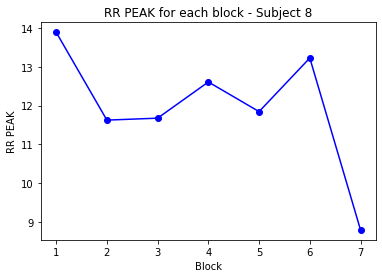

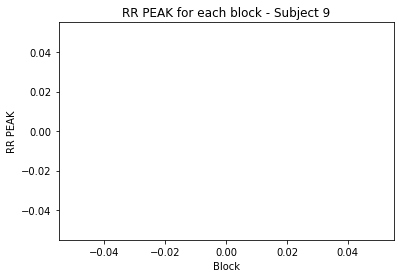

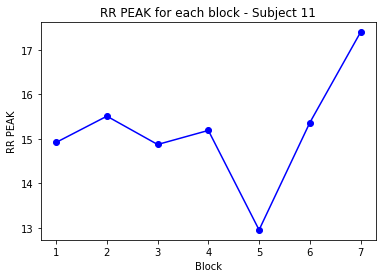

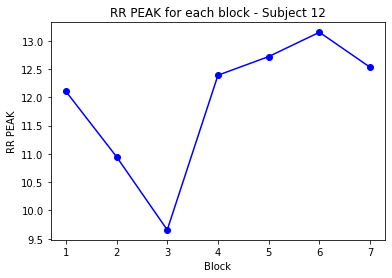

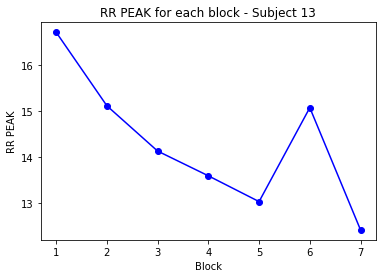

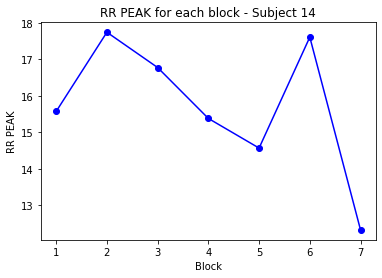

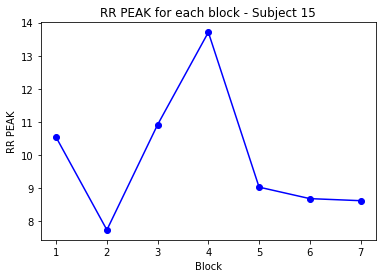

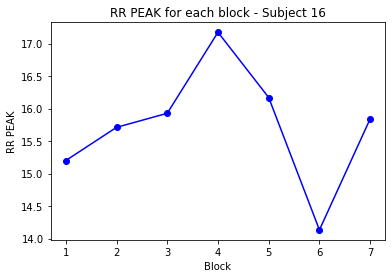

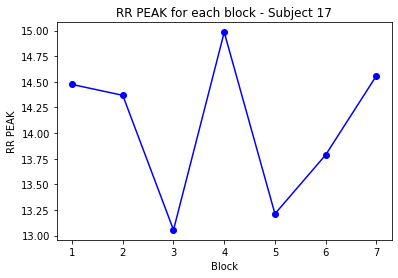

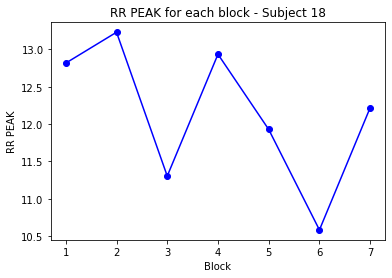

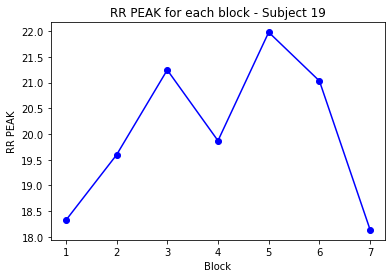

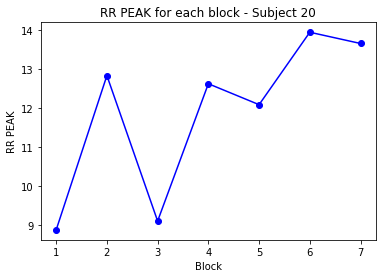

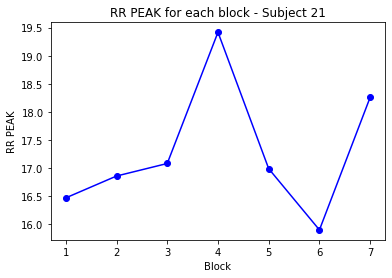

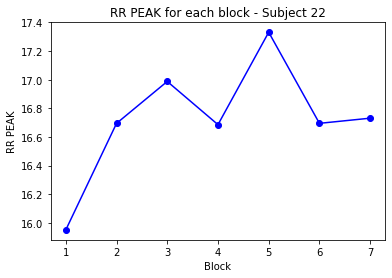

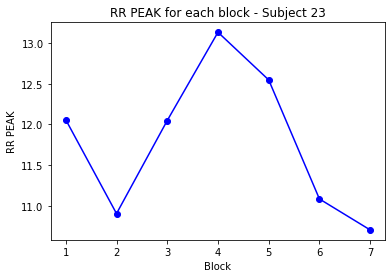

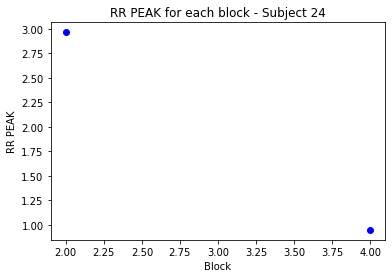

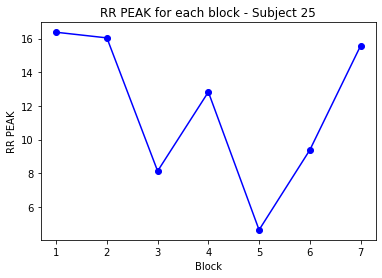

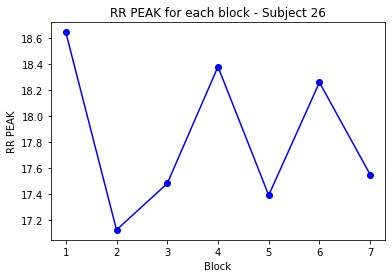

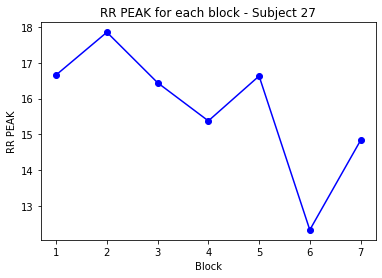

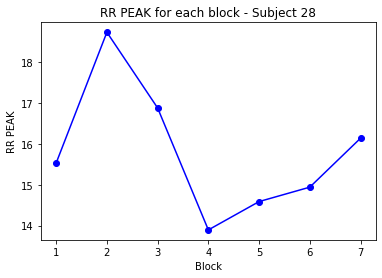

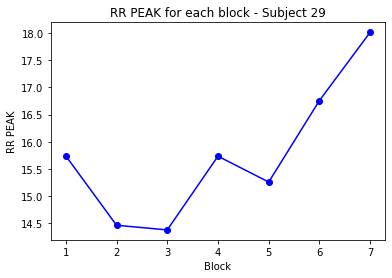

Group 1 Subjects:  [15, 16, 18, 19, 21, 22, 23, 27, 28]
Group 2 Subjects:  [11, 12, 13, 14, 17, 20, 25, 29]


In [37]:
import scipy.io
import numpy as np
import scipy.signal as signal

# Define file path and range of files to process
file_name = 'Physio_Events_'
file_prefix = 'D:/IU/Academics/Semester 2/DATA SCI OF PHYSIO TIME SERIE/Final Project/records/'+file_name
file_range = range(8, 30)

# Define the threshold for fast respiration and pauses
fast_resp_thresh = 25 # in breaths per minute
pause_thresh = 2 # in seconds

subjects_resp_rate_peaks = {}

group1_block2_rr = []
group1_block3_rr = []
group1_block6_rr = []
group2_block2_rr = []
group2_block3_rr = []
group2_block6_rr = []

group1_subjects = []
group2_subjects = []

# Process each file in the specified range
for i in file_range:
    file_path = file_prefix + str(i) + '.mat'
    mat_data = scipy.io.loadmat(file_path)
    bpdata = mat_data['bp_data'][0][0][0]
    block_start = get_block_start(i, mat_data)
    rsp_data = bpdata[:, 1]
    try:
        rsp_cleaned_block = clean_rsp(block_start, rsp_data)
        resp_rate_blocks = []
        for j in range(1, len(rsp_cleaned_block)):
            peaks, _ = signal.find_peaks(rsp_cleaned_block[j], height=0)
            troughs, _ = signal.find_peaks(-rsp_cleaned_block[j], height=0)
            time_diff_peaks = np.diff(peaks) / 1000  # convert to seconds
            time_diff_troughs = np.diff(troughs) / 1000  # convert to seconds

            # Calculate respiration rate
            resp_rate_peaks = 60 / np.mean(time_diff_peaks)
            resp_rate_troughs = 60 / np.mean(time_diff_troughs)
            resp_rate_blocks.append(resp_rate_peaks)
        if (resp_rate_blocks[2] > resp_rate_blocks[5]):
            group1_block2_rr.append(resp_rate_blocks[1])
            group1_block3_rr.append(resp_rate_blocks[2])
            group1_block6_rr.append(resp_rate_blocks[5])
            group1_subjects.append(i)
        elif (resp_rate_blocks[2] <= resp_rate_blocks[1]) and (resp_rate_blocks[5] > resp_rate_blocks[2]):
            group2_block2_rr.append(resp_rate_blocks[1])
            group2_block3_rr.append(resp_rate_blocks[2])
            group2_block6_rr.append(resp_rate_blocks[5])
            group2_subjects.append(i)
        subjects_resp_rate_peaks[i] = resp_rate_blocks
    except:
        print(str(i)+" is excepted")

print(subjects_resp_rate_peaks)
for subject in subjects_resp_rate_peaks.keys():
    plot_rsp(subjects_resp_rate_peaks[subject], 'RR PEAK', subject)
    
print("Group 1 Subjects: ", group1_subjects)
print("Group 2 Subjects: ", group2_subjects)

# Use only the selected blocks for ANOVA
data_group1 = pd.DataFrame({'block2_rr': group1_block2_rr, 'block3_rr': group1_block3_rr, 'block6_rr': group1_block6_rr})
data_group2 = pd.DataFrame({'block2_rr': group2_block2_rr, 'block3_rr': group2_block3_rr, 'block6_rr': group2_block6_rr})

# Add a column to each dataframe to indicate the group of the subject
data_group1['group'] = '1'
data_group2['group'] = '2'

# Combine the dataframes
data = pd.concat([data_group1, data_group2])

# Convert the data in the relevant columns to float
data['block3_rr'] = data['block3_rr'].astype(float)
data['block6_rr'] = data['block6_rr'].astype(float)
data['block2_rr'] = data['block2_rr'].astype(float)

data.to_csv('rr_data.csv')

10 is excepted


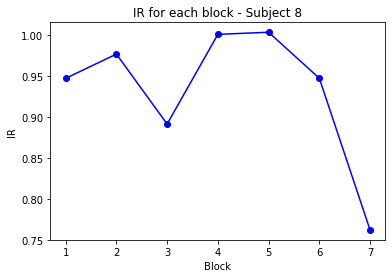

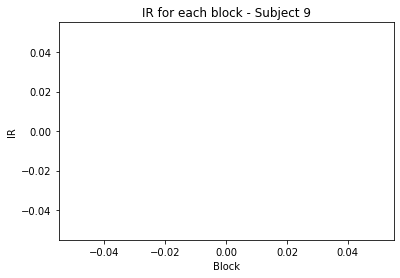

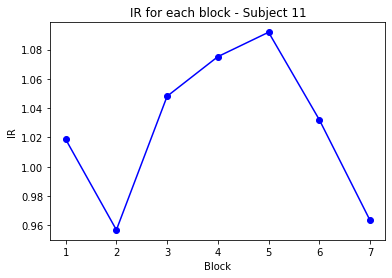

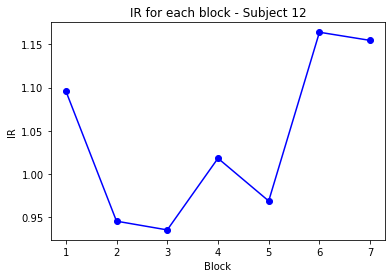

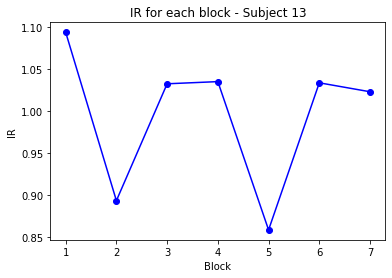

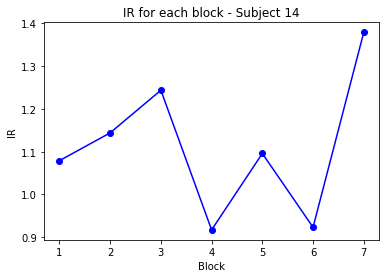

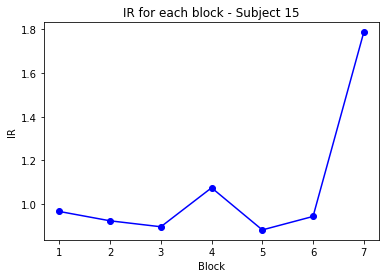

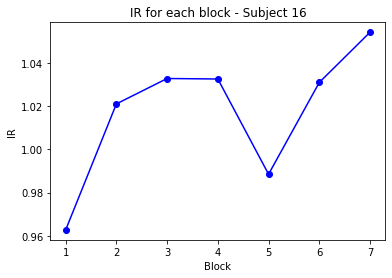

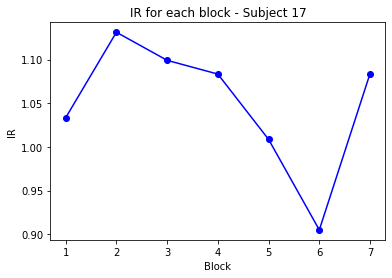

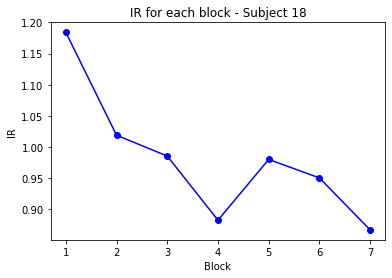

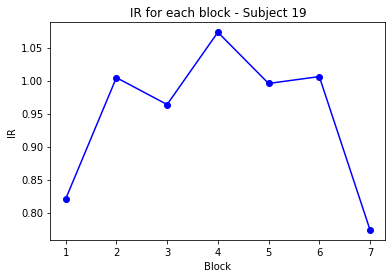

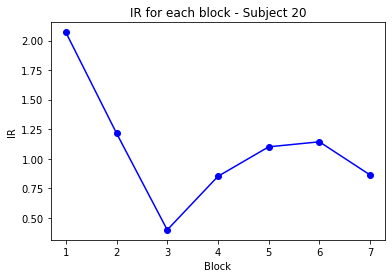

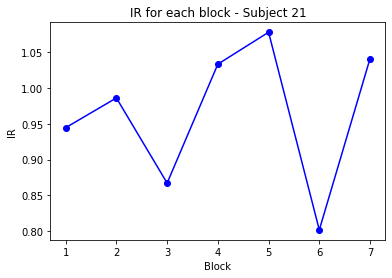

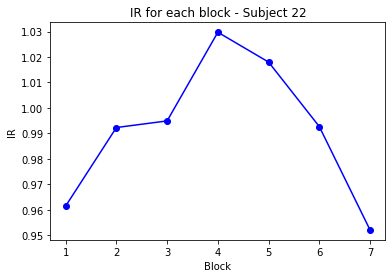

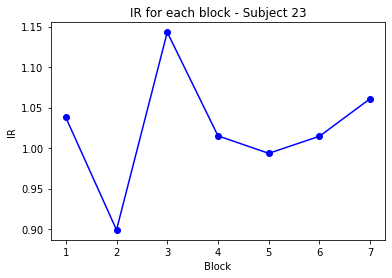

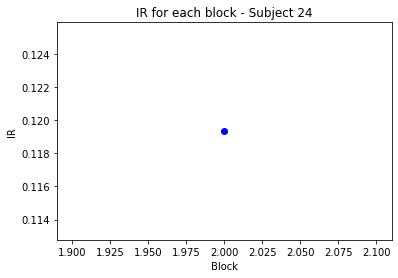

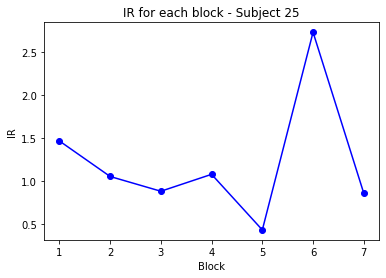

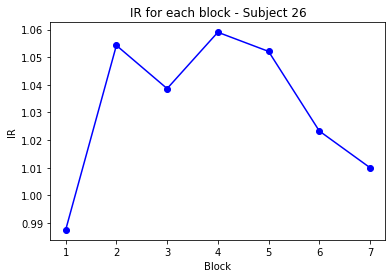

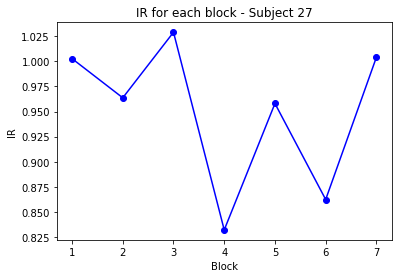

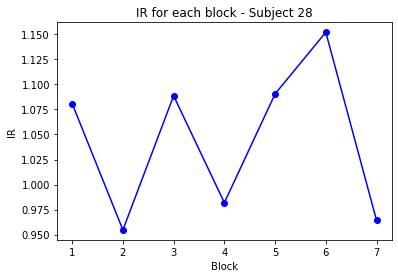

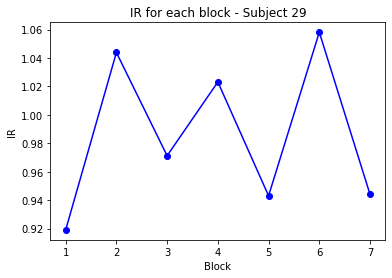

Group 1 Subjects:  [11, 14, 16, 17, 18, 21, 22, 23, 26, 27]
Group 2 Subjects:  [8, 12, 15, 19, 20, 25, 29]


In [48]:
import scipy.io
import numpy as np
import scipy.signal as signal

# Define file path and range of files to process
file_name = 'Physio_Events_'
file_prefix = 'D:/IU/Academics/Semester 2/DATA SCI OF PHYSIO TIME SERIE/Final Project/records/'+file_name
file_range = range(8, 30)

# Define the threshold for fast respiration and pauses
fast_resp_thresh = 25 # in breaths per minute
pause_thresh = 2 # in seconds

subjects_ir = {}

group1_block2_ir = []
group1_block3_ir = []
group1_block6_ir = []
group2_block2_ir = []
group2_block3_ir = []
group2_block6_ir = []

group1_subjects = []
group2_subjects = []

# Process each file in the specified range
for i in file_range:
    file_path = file_prefix + str(i) + '.mat'
    mat_data = scipy.io.loadmat(file_path)
    bpdata = mat_data['bp_data'][0][0][0]
    block_start = get_block_start(i, mat_data)
    rsp_data = bpdata[:, 1]
    try:
        rsp_cleaned_block = clean_rsp(block_start, rsp_data)
        ier_blocks = []
        for j in range(1, len(rsp_cleaned_block)):
            peaks, _ = signal.find_peaks(rsp_cleaned_block[j], height=0)
            # calculate time difference between adjacent peaks
            peak_times = peaks / 1000.0  # convert peak indices to time in seconds
            peak_diff = np.diff(peak_times)

            # calculate respiration rate (breaths per minute)
            resp_rate = 60.0 / np.mean(peak_diff)

            # calculate inspiration/expiration ratio
            insp_exp_ratio = np.mean(peak_diff[::2]) / np.mean(peak_diff[1::2])

            ier_blocks.append(insp_exp_ratio)
        subjects_ir[i] = ier_blocks
        if (ier_blocks[2] > ier_blocks[5]):
            group1_block2_ir.append(ier_blocks[1])
            group1_block3_ir.append(ier_blocks[2])
            group1_block6_ir.append(ier_blocks[5])
            group1_subjects.append(i)
        elif (ier_blocks[2] <= ier_blocks[1]) and (ier_blocks[5] > ier_blocks[2]):
            group2_block2_ir.append(ier_blocks[1])
            group2_block3_ir.append(ier_blocks[2])
            group2_block6_ir.append(ier_blocks[5])
            group2_subjects.append(i)
    except:
        print(str(i)+" is excepted")

for subject in subjects_ir.keys():
    plot_rsp(subjects_ir[subject], 'IR', subject)

print("Group 1 Subjects: ", group1_subjects)
print("Group 2 Subjects: ", group2_subjects)

# Use only the selected blocks for ANOVA
data_group1 = pd.DataFrame({'block2_ir': group1_block2_ir, 'block3_ir': group1_block3_ir, 'block6_ir': group1_block6_ir})
data_group2 = pd.DataFrame({'block2_ir': group2_block2_ir, 'block3_ir': group2_block3_ir, 'block6_ir': group2_block6_ir})

# Add a column to each dataframe to indicate the group of the subject
data_group1['group'] = '1'
data_group2['group'] = '2'

# Combine the dataframes
data = pd.concat([data_group1, data_group2])

# Convert the data in the relevant columns to float
data['block3_ir'] = data['block3_ir'].astype(float)
data['block6_ir'] = data['block6_ir'].astype(float)
data['block2_ir'] = data['block2_ir'].astype(float)

data.to_csv('ir_data.csv')